In [1]:
import glucifer.lavavu as lavavu
import numpy as np
import h5py

# Load sample Data

In [2]:
outdir = './outputs/'

mesh        = h5py.File(outdir + 'mesh.h5', 'r')
swarm       = h5py.File(outdir + 'swarm-60.h5', 'r')
material    = h5py.File(outdir + 'material-60.h5', 'r')
velocity    = h5py.File(outdir + 'velocity-60.h5', 'r')
pstrain    = h5py.File(outdir + 'Pstrain-60.h5', 'r')


tin = h5py.File('outbdls/h5/tin.time60.p0.hdf5', 'r')

In [3]:
lv = lavavu.Viewer(border=False, background="#51576e")

## Badlands Surface

In [4]:
#Plot the triangles
tris = lv.triangles("trisurface")

#Load the vertices
verts = np.array(tin["coords"])
verts *= 0.001
tris.vertices(verts)

#Convert indices to offset 0 before loading by subtracting 1
indices = tin["cells"] - np.array([1,1,1])
tris.indices(indices)

In [5]:
#Use one of the 3 available fields to colour the surface
#elevation = np.array(tin["coords"])[:,2]
#tris.values(elevation)
tris.values(tin["precipitation"])

cm = tris.colourmap("diverge") #Apply a built in colourmap
cb = tris.colourbar()

In [6]:
#Apply some vertical scaling
lv.scale('z', 3)

## Underworld Model

In [7]:
#Extract mesh res
dims = mesh.attrs["mesh resolution"]
dims += 1 #increment dims to get node count (instead of element count)

#Extract corner coords
minv = mesh.attrs["min"].tolist()
maxv = mesh.attrs["max"].tolist()

#Y coord to plot 2d cross section data from Underworld
Y = 0

#Convert from 2d to 3d by adding another dimension
minv = [minv[0], 0, minv[1]] #.append(0)
maxv = [maxv[0], Y, maxv[1]] #.append(-50)
dims = [dims[0], 1, dims[1]]
print dims,[minv, maxv]

[193, 1, 52] [[0.0, 0, -27.999999999999996], [192.0, 0, 22.0]]


## Vector arrows

Load the velocity field and plot sub-sampled as arrows

In [8]:
#X/Y ordering swapped in mesh.h5
meshres = (mesh.attrs["mesh resolution"][1]+1, mesh.attrs["mesh resolution"][0]+1, 3)

#Convert the vertex & vector arrays to 3d with numpy
verts = np.reshape(mesh["vertices"], (-1,2))
verts = np.insert(verts, 1, values=Y, axis=1) #Add 3rd dimension as Y column
vecs = np.reshape(velocity["data"], (-1,2))
vecs = np.insert(vecs, 1, values=0, axis=1)   #Add 3rd dimension as Y column

#Sub-sample vectors with numpy by taking every 20th (ignores grid, for a more irregular pattern)
sverts = verts[0::20]
svecs = vecs[0::20]

#Load vectors
vec = lv.vectors("velocity", arrowhead=5, colour="#55554d", scaling=18)
vec.vertices(sverts)
vec.vectors(svecs)

#Clip off the air layers
vec["zmax"] = 0.6

## Particles

Load the swarm and plot material layers

In [9]:
#Convert the swarm to 3d with numpy
verts = np.reshape(swarm["data"], (-1,2))
verts = np.insert(verts, 1, values=Y, axis=1) #Add 3rd dimension column

#Enable point sub-sampling
lv["pointsubsample"] = 2
particles = lv.points("pstrain")

#Plot material particles
particles.vertices(verts)
particles.values(pstrain["data"], 'pstrain')
#Use a colour map, "coolwarm" is like the paraview default
colourmap = particles.colourmap("coolwarm")
#print lavavu.colourMaps["coolwarm"]
#colourmap = particles.colourmap("#3b4cc0:0.0 #7396f5 #b0cbfc #dcdcdc #f6bfa5 #ea7b60 #b50b27")
particles.colourbar()

## Interactive controls

Along with viewer window, controls can be added to adjust properties dynamically

In [10]:
lv.control.Panel()
#lv.control.Range(command='background', range=(0,1), step=0.1, value=1)
lv.control.Range(command='scale z', range=(0.5,5), step=0.1, value=3)
#particles.control.Range('size', range=(0,10), step=0.1, value=1)
#vec.control.Range('scaling', label="Arrow scale", range=(1, 30), step=1, value=18)
lv.control.ObjectList()
lv.control.show()

<IPython.core.display.Javascript object>

In [11]:
lv.camera() #Get current camera as set in viewer

lv.translation(0.0, 0.0, -352.361450195312)
lv.rotation(0.0, 0.0, 0.0, 1.0)



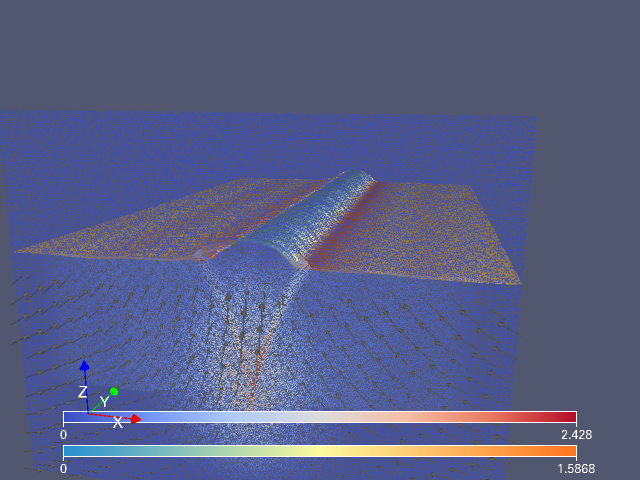

In [36]:
#Plot a static image with a saved camera setup
lv.translation(0.0, 0.0, -352.361450195312)
lv.rotation(-0.62527871131897, -0.0552990511059761, -0.0777046531438828, 0.774547636508942)
lv.display()
fn = lv.image('saved.png', resolution=[1280, 960], transparent=False) #Save to disk

In [37]:
#State of properties and view can be loaded and saved to a file
lv.save("state.json")
#lv.file("state.json")